# Systems & Synthetic Biology
## Part 1: Simulating ODEs with python
This notebook will guide you through the steps needed to simulate systems of ordinary differential equations in python.



### Step 1: Importing modules
First we import the modules we will need later on. We already introduced numpy and matplotlib in the python tutorial. For the actual numerical integration we will use the function **odeint** from the **scipy** module. Since this is the only function in this module that we will use, we will import it directly.

In [1]:
#import necessary packages
import numpy as np #math and arrays
from scipy.integrate import odeint #differential equations
import matplotlib.pyplot as plt #plotting

In [2]:
#run a "magic" command to make sure figures are rendered properly in the notebook
%matplotlib inline

### Step 2: Define a system of differential equations
Next, we need to define our system of differential equations. For this example, we will use a simple system with two equations:
\begin{align}
\frac{dx_1}{dt} &= a \cdot x_1 - b\cdot x_1\cdot x_2\\
\frac{dx_2}{dt} &= c \cdot x_1\cdot x_2 - d \cdot x_2
\end{align}
Here, $x_1$ and $x_2$ are the two state variables and $a$, $b$, $c$, and $d$ are parameters. This system can be thought of as a representation of simple predator prey dynamics, where $x_1$ is the density of the prey and $x_2$ is the density of the predator.

The numerical integration function we will use (**odeint**) requires us to define a function that calculates the derivatives of all state variables as specified by our differential equation. Note that we will not be calling this derivative function ourselves; it will be passed on to odeint which will call it internally. The numerical integration performed by odeint is essentially similar to the forward euler scheme explained in the lectures. It will start at an initial condition, calculate the derivatives there and use those to take a small step forward in time. This process is repeated until the specified end time is reached. The main difference with forward euler is that the size of the time steps is chosen automatically the steps are a bit more complicated and more accurate, but the process still relies on repeated evaluations of the derivatives. 

Therefore, the function for the derivatives of our ODE must therefore be defined in the way that the odeint function expects. 
It will pass a list of current values for all states to the first argument, the current time point to the second, and a list of parameters you gave it will be passed to the remaining arguments. This means that even though we will almost never use the value of the current time point, we still need to provide a parameter for it in our derivative function, because that is what odeint expects. The expected output is a list of derivatives of all states in the same order.

In [3]:
def deriv(x, t, parameters):
    
    # Unpack the state variable information
    # The first argument contains the values of the state variables in order
    x1 = x[0] 
    x2 = x[1]
    
    # Unpack the parameter values - similar to the state variables above
    a = parameters[0]
    b = parameters[1]
    c = parameters[2]
    d = parameters[3]

    # Calculate the derivatives of the two states
    dx1dt = a*x1 - b*x1*x2
    dx2dt = c*x1*x2 - d*x2
    
    # Make a list of all derivatives in the correct order
    dxdt = [dx1dt, dx2dt]

    # Return the derivatives
    return dxdt

### Step 3: Set the parameters for the simulation experiment
Now, we specify the precise conditions for which we want our ODEs simulated. First, we make a numpy array with all the time steps for which we want our states calculated. (Note that these are not the integration time steps used by odeint. If the integration requires smaller time steps to be accurate, odeint will use more steps internally but provide output only at the steps you specified.)

In [4]:
# Define the simulation end time and number of time points for which you want output
t_end = 10
Nsteps = 200

# Make a numpy array with the time steps for which you want output
timepoints = np.linspace(0, t_end, Nsteps) 

Then, we can specify the values of the parameters we want to use. For now, let's set them all to 1. Parameters need to be provided in a tuple *in the same order* as they appear in the derivatives function we specified above. (Using the same variable names as in the derivatives function is recommended to prevent confusion, but python has no way of linking the variable names you use here to the ones from above, so it will look only at the order in which they are provided.)

In [5]:
# Specify parameter values
a = 1
b = 1
c = 1
d = 1
parameters = (a,b,c,d)

The last thing we need to do before we can start the actual simulation is defining the initial conditions of the state variables. Again, these need to be provided in the same order that you used in the derivative function.

In [6]:
# Set initial values for all state variables
x1_init = 2
x2_init = 4

x_init = [x1_init, x2_init] #combine into a list

### Step 4: Run the simulation experiment
Now we are ready to call the **odeint** function. This function takes three required arguments: the derivative function we defined at the beginning, the list of initial conditions, and the array of time points. If your derivative function needs any parameters, these should be passed in a tuple to an optional argument called **args**.

In [7]:
# Calculate state variables at requested time points, note here that the ,) in the args term 
# is required to avoid errors when running
x_t = odeint(deriv, x_init, timepoints, args = (parameters,))

The odeint function returns a numpy matrix with a column for each state variable and a row for each time point in the timepoints array, containing the values of these state variables at these time points.

In [8]:
# Separate results into arrays for each state variable
x1_t = x_t[:,0]
x2_t = x_t[:,1]

### Step 5: Plot the results 
Finally, we can plot the results of the numerical integration using matplotlib.

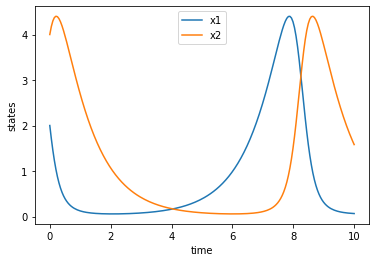

In [9]:
# Plot the state variables against time
plt.plot(timepoints, x1_t, label='x1')
plt.plot(timepoints, x2_t, label='x2')
plt.legend()
plt.xlabel('time')
plt.ylabel('states')
plt.show()

### Running multiple simulations
If you want to run multiple simulations, it may be convenient to wrap the entire simulation code into a function that takes the parameters and initial conditions as input arguments. You can have your function return both the array of timepoints and the simulation results by separating them with a comma.

In [14]:
def simulateODE(parameter_values, initial_conditions, t_end = 10, Nsteps = 200):
    # Note here that t_end and Nsteps have been given default values - these values are used if no values are
    # specified when using the function

    # Make a numpy array with the time steps for which you want output
    timepoints = np.linspace(0, t_end, Nsteps)

    # Specify parameter values
    parameters = parameter_values

    # Set initial values for all state variables
    x_init = initial_conditions

    # Calculate state variables at requested time points
    x_t = odeint(deriv, x_init, timepoints, args = (parameters,))
    
    # Return time points and state variables at those time points
    # This technically combines both variables into a tuple which can be unpacked after calling the function
    return timepoints, x_t


The same thing can be done for the plotting code.

In [15]:
def plotODEoutput(timepoints, x_t):
    # Separate results into arrays for each state variable
    x1_t = x_t[:,0]
    x2_t = x_t[:,1]
    
    # Plot the state variables against time
    plt.plot(timepoints, x1_t, label='x1')
    plt.plot(timepoints, x2_t, label='x2')
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('states')
    plt.show()
    

You can then call these functions multiple times for different settings without having to rewrite all that code over and over again. To split the output from the simulation function back into two separate arrays, simply provide two variable names separated by a comma.

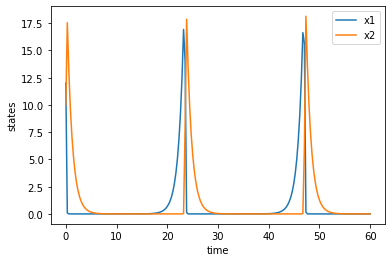

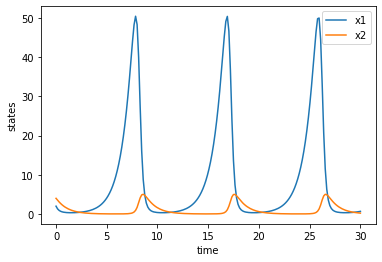

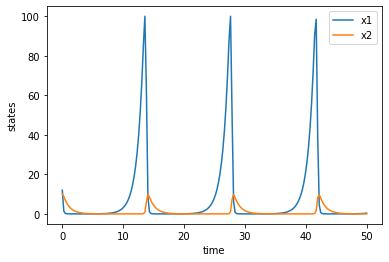

In [20]:
# Simulations for various parameter values and initial conditions
parameters = [1,1,1,1]
initial_conditions = [12,10]
timepoints, x_t = simulateODE(parameters,initial_conditions, t_end = 60)
plotODEoutput(timepoints, x_t)

parameters = [1,1,0.1,1]
initial_conditions = [2,4]
timepoints, x_t = simulateODE(parameters,initial_conditions, t_end = 30)
plotODEoutput(timepoints, x_t)

parameters = [1,1,0.1,1]
initial_conditions = [12,10]
timepoints, x_t = simulateODE(parameters,initial_conditions, t_end = 50)
plotODEoutput(timepoints, x_t)


Alternatively, a script could be written with a for loop to plot all the states in the output array in a single figure, regardless of how many states there are. To determine the number of states in an output array x_t, you can use the len function on the first row of this array (so Nstates = len(x_t[0,:]) ).

For the labels in the legend, this will give some trouble, because you don't know how to label the output of an arbitrary ODE in advance. To solve this problem, you can add an optional argument labels that takes a list of names to use as labels (one for each state) and defaults to an empty list. You can then use a conditional statement to set the label to the element that corresponds with the current state if the labels list is long enough to contain this entry. If not, you can skip the label by feeding the label argument an empty character string (label = '').

In [21]:
def plotODEoutput_withForLoop(timepoints, x_t, labels = []):
    # Determine the number of states in the output array
    Nstates = len(x_t[0,:])
    
    # Loop over the number of states
    for ii in range(Nstates):
        # Get the time series data of the state at the current index
        xii_t = x_t[:,ii]
    
        # If the labels argument has an element at the current index, use that element as label
        if len(labels) > ii:
            label = labels[ii]
        else: # If not, leave the label empty
            label = ''
            
        # Plot the current state variable against time
        plt.plot(timepoints, xii_t, label=label)
        
    # These statements apply to the entire figure and should be outside the for loop
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('states')
    plt.show()

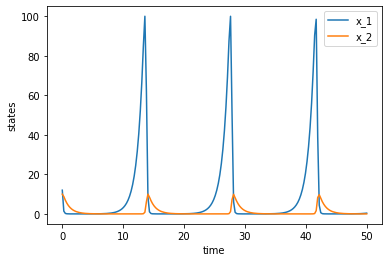

In [23]:
# We can use this script and you should get the same plot as one of those obtained above
plotODEoutput_withForLoop(timepoints, x_t, labels = ['x_1','x_2'])

## Part 2: Coding the iBioSim model
We are going to focus here on the ODEs of the simple model. For ease with coding we will re-label the species and reaction rates to something less cumbersome. The parameter values and interpretation of the species labels is given in the code-blocks below. Using these we have

\begin{align}
\frac{dx_1}{dt} &= kc_rx_5 - kc_fx_1^{n_1}x_4^{n_2}\nonumber \\
\frac{dx_2}{dt} &= kc_rx_3 - kc_fx_2^{n_3}x_6^{n_4}\nonumber \\
\frac{dx_3}{dt} &= kc_fx_2^{n_3}x_6^{n_4} - kc_rx_3\nonumber \\
\frac{dx_4}{dt} &= kc_rx_5 - kc_fx_1^{n_1}x_4^{n_2} + 10ko_1\nonumber \\
\frac{dx_5}{dt} &= kc_fx_1^{n_1}x_4^{n_2} - kc_rx_5 - k_{d1}x_5\nonumber \\
\frac{dx_6}{dt} &= kc_rx_3 - kc_fx_2^{n_3}x_6^{n_4} + 10x_8\frac{\frac{k_bko_{f1}}{ko_{r1}}n_r + \frac{k_akao_f}{kao_r}n_r\bigg(\frac{ka_f}{ka_r}x_5\bigg)^{n_5}}{1 + \frac{ko_{f1}}{ko_{r1}}n_r + \frac{kao_f}{kao_r}n_r\bigg(\frac{ka_f}{ka_r}x_5\bigg)^{n_5}}\nonumber \\
\frac{dx_7}{dt} &= 10x_8\frac{\frac{k_bko_{f1}}{ko_{r1}}n_r + \frac{k_akao_f}{kao_r}n_r\bigg(\frac{ka_f}{ka_r}x_5\bigg)^{n_5}}{1 + \frac{ko_{f1}}{ko_{r1}}n_r + \frac{kao_f}{kao_r}n_r\bigg(\frac{ka_f}{ka_r}x_5\bigg)^{n_5}} + 10ko_2 - k_{d2}x_7\nonumber \\
\frac{dx_8}{dt} &= 0\nonumber \\
\frac{dx_9}{dt} &= 10x_{10}\frac{ko_3\frac{ko_{f2}}{ko_{r2}}n_r}{1+\frac{ko_{f2}}{ko_{r2}}n_r+\bigg(\frac{kr_f}{kr_r}x_3\bigg)^{n_6}} + 10ko_3 - k_{d3}x_9\nonumber \\
\frac{dx_{10}}{dt} &= 0\nonumber
\end{align}

Given the parameter values and the initial conditions in the appendix tables, simulate the system from an initial timepoint of 0 to 1000 with 10000 timesteps. Note the initial Ara ($x_1$) concentration = 1.

When coding the ODE model, we will define a vector of parameters to be

parameters = ($kc_r,kc_f,ko_1,k_{d1},k_b,ko_{f1},ko_{r1},n_r,k_a,kao_f,kao_r,ka_f,ka_r,ko_2,k_{d2},ko_3,k_{d3},ko_{f2},ko_{r2},kr_f,kr_r,n_1,n_2,n_3,n_4,n_5,n_6$)

and initial conditions that have been provided for you.

Plot the resulting time-series of GFP. Does this match what you saw on iBioSim?

In [24]:
# Specify parameter values
kcr = 1
kcf = 0.05
ko1 = 0.05
kd1 = 0.0075
kb = 0.0001
kof1 = 0.033
kor1 = 1
nr = 30
ka = 0.25
kaof = 1
kaor = 1
kaf = 0.033
kar = 1
ko2 = 0.05
kd2 = 0.0075
ko3 = 0.05
kd3 = 0.0075
kof2 = 0.033
kor2 = 1
krf = 0.5
krr = 1
n1 = 1
n2 = 1
n3 = 1
n4 = 1
n5 = 2
n6 = 2

# set up parameters vector
parameters = [kcr, kcf, ko1, kd1, kb, kof1, kor1, nr, ka, kaof, kaor, kaf, kar, ko2, kd2, ko3, kd3, kof2, kor2, krf, krr, n1, n2, n3, n4, n5, n6]

In [25]:
# Set initial values for all state variables
x1_init = 1 # x1 = Ara
x2_init = 10 # x2 = dCas9
x3_init = 0 # x3 = sgRNA-dCas9
x4_init = 0 # x4 = AraC
x5_init = 0 # x5 = AraComplex
x6_init = 0 # x6 = sgRNA
x7_init = 0 # x7 = mKO2
x8_init = 2 # x8 = pBAD
x9_init = 0 # x9 = GFP
x10_init = 2 # x10 = pGFP

# set up vector
initial_conditions = [x1_init, x2_init, x3_init, x4_init, x5_init, x6_init, x7_init, x8_init, x9_init, x10_init]

In [26]:
def deriv(x, t, parameters):
    
    # Unpack the state variable information
    # The first argument contains the values of the state variables in order
    x1 = x[0] # Ara
    x2 = x[1] # dCas9
    x3 = x[2] # sgRNA-dCas9
    x4 = x[3] # AraC
    x5 = x[4] # AraComplex
    x6 = x[5] # sgRNA
    x7 = x[6] # mKO2
    x8 = x[7] # pBAD
    x9 = x[8] # GFP
    x10 = x[9] # pGFP
    
    # Unpack parameter values
    kcr = parameters[0]
    kcf = parameters[1]
    ko1 = parameters[2]
    kd1 = parameters[3]
    kb = parameters[4]
    kof1 = parameters[5]
    kor1 = parameters[6]
    nr = parameters[7]
    ka = parameters[8]
    kaof = parameters[9]
    kaor = parameters[10]
    kaf = parameters[11]
    kar = parameters[12]
    ko2 = parameters[13]
    kd2 = parameters[14]
    ko3 = parameters[15]
    kd3 = parameters[16]
    kof2 = parameters[17]
    kor2 = parameters[18]
    krf = parameters[19]
    krr = parameters[20]
    n1 = parameters[21]
    n2 = parameters[22]
    n3 = parameters[23]
    n4 = parameters[24]
    n5 = parameters[25]
    n6 = parameters[26]

    # Calculate the derivatives of the states
    dx1dt = kcr*x5 - kcf*(x1**n1)*(x4**n2)
    dx2dt = kcr*x3 - kcf*(x2**n3)*(x6**n4)
    dx3dt = kcf*(n2**n3)*(x6**n4) - kcr*x3
    dx4dt = kcr*x5 - kcf*(x1**n1)*(x4**n2) + 10*ko1
    dx5dt = kcf*(x1**n1)*(n4**n2) - kcr*x5 - kd1*x5
    dx6dt = kcr*x3 - kcf*(x2**n3)*(x6**n4) + 10*x8*((kb*kof1/kor1)*nr + (ka*kaof/kaor)*nr*((kaf*x5/kar)**n5))/(1 + (kof1/kor1)*nr + (kaof/kaor)*nr*((kaf*x5/kar)**n5))
    dx7dt = 10*x8*((kb*kof1/kor1)*nr + (ka*kaof/kaor)*nr*((kaf*x5/kar)**n5))/(1 + (kof1/kor1)*nr + (kaof/kaor)*nr*((kaf*x5/kar)**n5)) + 10*ko2 - kd2*x7 
    dx8dt = 0
    dx9dt = 10*x10*(ko3*kof2*nr/kor2)/(1 + (kof2*nr/kor2) + ((krf*x3/krr)**n6)) + 10*ko3 - kd3*x9
    dx10dt = 0
    
    # Make a list of all derivatives in the correct order
    dxdt = [dx1dt, dx2dt, dx3dt, dx4dt, dx5dt, dx6dt, dx7dt, dx8dt, dx9dt, dx10dt]

    # Return the derivatives
    return dxdt

In [30]:
def simulateODE(parameter_values, initial_conditions, t_end = 1000, Nsteps = 10000):

    # Make a numpy array with the time steps for which you want output
    timepoints = np.linspace(0, t_end, Nsteps)
    
    # Assign parameters
    parameters = parameter_values
    
    # Set initial values for all state variables
    x_init = initial_conditions
    
    # Calculate state variables at requested time points
    x_t = odeint(deriv, x_init, timepoints, args = (parameters,))
    
    # Return time points and state variables at those time points
    # This technically combines both variables into a tuple which can be unpacked after calling the function
    return timepoints, x_t

In [31]:
def plotODEoutput(timepoints, x_t):
    # Separate results into arrays for each state variable
    gfp_t = x_t[:,8]
    
    # Plot the state variables against time
    plt.plot(timepoints, gfp_t, label='Ara = 1')
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('GFP')
    plt.show()
    return gfp_t

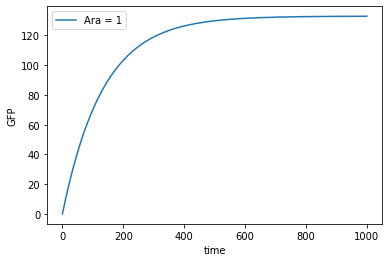

In [32]:
timepoints, x_t = simulateODE(parameters, initial_conditions, t_end = 1000, Nsteps = 10000)
gfp_t = plotODEoutput(timepoints, x_t)